Test and debug functions from spikingDataUtilities

In [1]:
import numpy as np
import spikingDataUtilities as su
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [6]:
# test restrict

# first column of samples is assumed to be time stamps at which all other columns are evaluated
samples = np.array([[0,9],[1.1,5],[3,8],[4,-1.5],[9,9],[7,2],[12,-2]])
# every row of intervals is an interval, sample time stamps must fall in at least one interval
intervals = [[1,3.2],[6,8],[11,14]]
su.restrict(samples,intervals,shift=True,s_ind=False,i_ind=True)

(array([[ 0.1,  5. ],
        [ 2. ,  8. ],
        [ 3.2,  2. ],
        [ 5.2, -2. ]]),
 array([0, 0, 1, 2]))

In [4]:
# test consolidateIntervals
intervals = [[1,3.2],[6,8],[2,4],[9,11],[10,11],[11.1,12.1],[11.6,11.8]]
su.consolidateIntervals(intervals)

array([[ 1. ,  4. ],
       [ 6. ,  8. ],
       [ 9. , 11. ],
       [11.1, 12.1]])

In [23]:
# test intersectIntervals
intervals1 = [[1,4],[9,11],[5,5.5],[6,8],[11.1,11.8],[12,12.5]]
intervals2 = [[2,5],[5.5,5.8],[6,7],[8.5,11.5],[14,16]]
intervals3 = [[2,3],[5,7.5],[8.1,11]]
intervals4 = [[2,12],[15,17.5]]
su.intersectIntervals((intervals1,intervals2,intervals3,intervals4))

array([[ 2.,  3.],
       [ 6.,  7.],
       [ 9., 11.]])

In [ ]:
# test shuffleEvents
#su.shuffleEvents([[1,4,1],[5,4,1],[6,8,0],[8,4,0],[10,8,0],[11,4,0],[12,4,1],[13,4,0],[14,8,0]])
su.shuffleEvents([[1,4],[5,4],[6,8],[8,4],[10,8],[11,4],[12,4],[13,4],[14,8]])

array([[ 1,  4,  1],
       [ 2,  4,  0],
       [ 4,  8,  0],
       [ 5,  4,  0],
       [ 5,  4,  1],
       [ 8,  8,  0],
       [12,  4,  1],
       [13,  4,  0],
       [14,  8,  0]])

In [2]:
# load MATLAB data
data = su.loadMATData('../Data/session1.mat')
regs = ['hpc','nr','pfc']

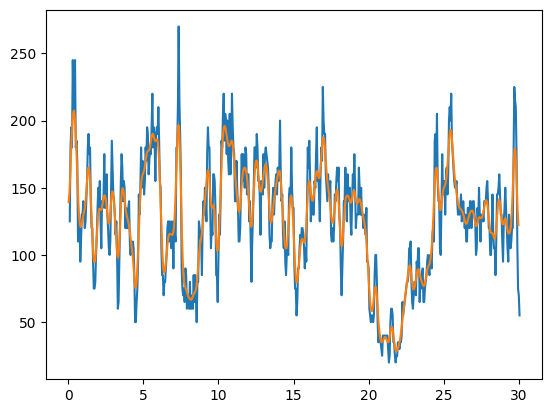

In [ ]:
# test firingRate
spikes = data['spikes_hpc']
# population firing rate
y1 = su.firingRate(spikes[:,0],0,30,0.2,step=4)
y2 = su.firingRate(spikes[:,0],0,30,smooth=2.5)
# compare bigger sliding windows with smaller-window smoothed signal
plt.plot(y1[:,0],y1[:,1])
plt.plot(y2[:,0],y2[:,1]);

In [3]:
# restrict data to nREM sleep
spikes_nrem = {r : su.restrict(data['spikes_'+r],data['nrem'],shift=True) for r in regs}
ripples_nrem = su.restrict(data['ripples'],data['nrem'],shift=True)

In [12]:
# region firing rates around ripples
ripple_intervals = ripples_nrem + [-0.5,0.5]
ripple_spikes = {r : su.restrict(spikes_nrem[r][:,0],ripple_intervals) for r in regs}
firing_rates = {r : su.firingRate(ripple_spikes[r],step=5,smooth=2) for r in regs}

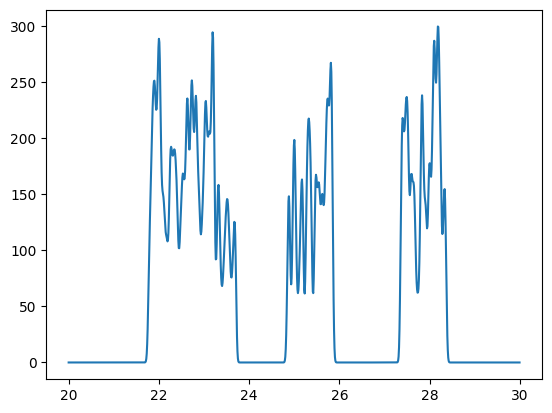

In [15]:
r = 'nr'
fr_plot = su.restrict(firing_rates[r],[20,30])
plt.plot(fr_plot[:,0],fr_plot[:,1]);

Prova high-passed LFP invece di spike count!!

ovvero: high pass, hilbert per avere envelope

Prova conn_covgc per analisi over time, prova conn_te se event times sono precisamente allineati

Posso usare workflow di statistica di MI per comparare real e shuffle in questo modo:

calcolo serie temporali di connettività per ripple (trial) e per shuffled ripples (non trial), dimensioni [trial,tmpo], una matrice per ogni coppia di regione, le stacko tutte con un semplice regressor (1 per real, 0 per shuffle)

